# Data Processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import Training Set

In [2]:
dataset_train = pd.read_csv('TrainSet.csv')

In [3]:
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


# Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


# Create proper datset with 60 timestep and 1 output....it means it will look 60 stock prices before t to produce output.

In [6]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60: i, 0]) #zero index as we need only one column
    y_train.append(training_set_scaled[i, 0]) #we want price at t+1
x_train , y_train = np.array(x_train),np.array(y_train) 
print(x_train)
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


# Reshaping (add new dimension)

In [7]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build RNN

# import library

In [8]:
conda install tensorflow

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [9]:
conda install keras

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.
C:\Users\SHRUNGI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SHRUNGI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SHRUNGI\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SHRUNGI\anaconda3\lib\site-packages\tensorflow\python\framework\d

In [11]:
regressor = Sequential() ## initialise RNN

#Adding the first LSTM layer and dropout regularisation 
#build stack LSTM
regressor.add(LSTM(units = 50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [12]:
#Adding second LSTM layer with DR
regressor.add(LSTM(units = 50,return_sequences = True, ))
regressor.add(Dropout(0.2))

In [13]:
#add thrid layer
regressor.add(LSTM(units = 50,return_sequences = True, ))
regressor.add(Dropout(0.2))

In [14]:
#add forth LSTM and DR (this is final layer and output layer will have one value)
#here set return as false as it is last and we dont want anything to return
regressor.add(LSTM(units = 50 ))
regressor.add(Dropout(0.2))

In [15]:
#output layer (unit = dimension or no of nueron)
regressor.add(Dense(units = 1))

In [16]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')  #adam optimizer

In [17]:
#Fittin the RNN to training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32 )#how many epochs



Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0386
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0063
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0057
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0046
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0045
Epoch 12/100
1198/1198 [==============================] - 4s 4ms/step - l

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 95/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 96/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014


# Make prediction and visualise results

In [18]:
#get real stock price
dataset_test = pd.read_csv('TestSet.csv')
realPrice = dataset_test.iloc[:, 1:2].values

In [19]:
#getting the predicted prices
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60: ].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)



In [21]:
x_test = []
y_test = []
for i in range(60,80):
    x_test.append(inputs[i-60: i, 0]) #zero index as we need only one column
    
x_test = np.array(x_test)
print(x_test)
#print(y_train)

[[0.9299055  0.93113327 0.92750577 ... 0.95725128 0.93796041 0.93688146]
 [0.93113327 0.92750577 0.94415507 ... 0.93796041 0.93688146 0.92955205]
 [0.92750577 0.94415507 0.93876032 ... 0.93688146 0.92955205 0.94731751]
 ...
 [0.96054394 0.9371419  0.92841729 ... 1.01045465 1.02407173 1.03930724]
 [0.9371419  0.92841729 0.90804747 ... 1.02407173 1.03930724 1.03354044]
 [0.92841729 0.90804747 0.8771858  ... 1.03930724 1.03354044 0.99624228]]


In [22]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)

In [23]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [25]:
print(predicted_stock_price)

[[783.4716 ]
 [780.505  ]
 [781.42584]
 [783.0919 ]
 [786.67865]
 [792.8401 ]
 [797.67975]
 [798.6294 ]
 [798.2229 ]
 [797.88824]
 [797.91144]
 [797.9537 ]
 [798.0209 ]
 [798.8508 ]
 [799.9536 ]
 [805.4019 ]
 [812.72253]
 [819.8261 ]
 [822.4458 ]
 [815.926  ]]


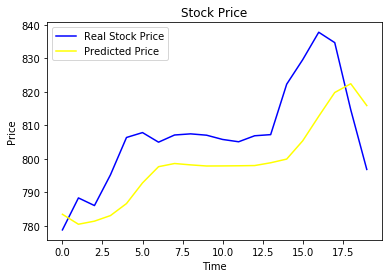

In [28]:
#visualise the results
plt.plot(realPrice, color = 'blue' , label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'yellow' , label = 'Predicted Price')
plt.title('Stock Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()